In [52]:
from sklearn.feature_selection import SelectKBest,chi2
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Read data(data we handled using Oversampling)

In [2]:
data = pd.read_csv('../Datasets/oversampled_data.csv')
data.head()

,Unnamed: 0,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0


In [3]:
del data['Unnamed: 0']

### Standardizing data and seperating X and y

In [9]:
std_sclr = StandardScaler()
X = data.drop(labels='churn',axis=1)
cols = X.columns
X = pd.DataFrame(std_sclr.fit_transform(X))
X.columns = cols
y = data[['churn']]
X.shape,y.shape

((5700, 18), (5700, 1))

### Checking propotions

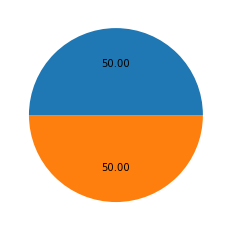

In [17]:
plt.pie(y.value_counts(),autopct='%.2f')
plt.show()

In [13]:
Best10Features = SelectKBest(score_func=chi2,k=10)

In [15]:
Best10Features.fit_transform(X,y)

ValueError: Input X must be non-negative.

### SelectKBest is throwing error for iversampled data saying the dataset is a sparse dataset

### using the original data to get best features using SelectKBest

In [54]:
data2 = pd.read_csv('../Datasets/telecommunications_churn.csv',sep=';')
data2.head()
X2 = data2.drop(labels='churn',axis=1)
y2 = data2[['churn']]
X2.shape,y2.shape

((3333, 18), (3333, 1))

In [67]:
selector = SelectKBest(score_func=chi2,k=10)
new_data = selector.fit_transform(X2,y2)
new_data.shape

(3333, 10)

In [69]:
best10features = X.columns[best10Features.get_support(indices=True)]
best10features


Index(['voice_mail_plan', 'voice_mail_messages', 'day_mins', 'evening_mins',
       'night_mins', 'customer_service_calls', 'international_plan',
       'day_charge', 'evening_charge', 'total_charge'],
      dtype='object')

In [73]:
X_new = selector.transform(X)
new_data = pd.DataFrame(X_new,columns=best10features)
new_data.shape

(5700, 10)

In [79]:
new_data.head()

,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,customer_service_calls,international_plan,day_charge,evening_charge,total_charge
0,1.0,25.0,265.1,197.4,244.7,1.0,0.0,45.07,16.78,75.56
1,1.0,26.0,161.6,195.5,254.4,1.0,0.0,27.47,16.62,59.24
2,0.0,0.0,243.4,121.2,162.6,0.0,0.0,41.38,10.30,62.29
3,0.0,0.0,299.4,61.9,196.9,2.0,1.0,50.90,5.26,66.80
4,0.0,0.0,166.7,148.3,186.9,3.0,1.0,28.34,12.61,52.09


In [76]:
data2.head()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0


In [80]:
new_data.shape,data.shape

((5700, 10), (5700, 19))